In [1]:
# PizzaHut Regression

In [2]:
#### Importing required modules

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
#for regression
import seaborn as sns
#for plotting heat_map
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
#for implementing ordinary least squares
from pandas.tools.plotting import scatter_matrix
#for plotting scatter_matrix
import math

In [4]:
#### Extracting the data from csv files

In [5]:
classification_data = pd.read_csv("Pizzademand_Classification.csv")
regression_data = pd.read_csv("Pizzademand_Regreesion.csv")

In [6]:
regression_data.dropna(how = 'any', inplace = True)

In [7]:
#classification_data['PizzaDemand'] = regression_data.PizzaDemand.copy()

In [8]:
#classification_data.dtypes
#classification_data.head()

In [9]:
#### Plotting scatter matrix

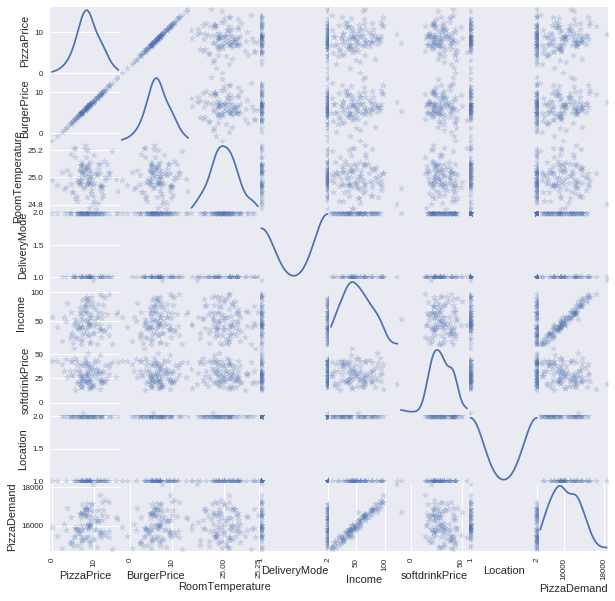

In [10]:
scatter_matrix(regression_data,alpha=0.2, figsize=(10, 10), diagonal='kde', grid=True, marker='*')
plt.show()

In [11]:
#plt.scatter(classification_data.RoomTemperature, classification_data.PizzaDemand, color='c')
#plt.show()

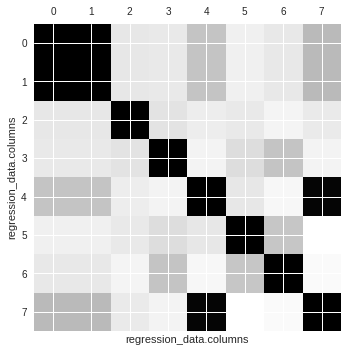

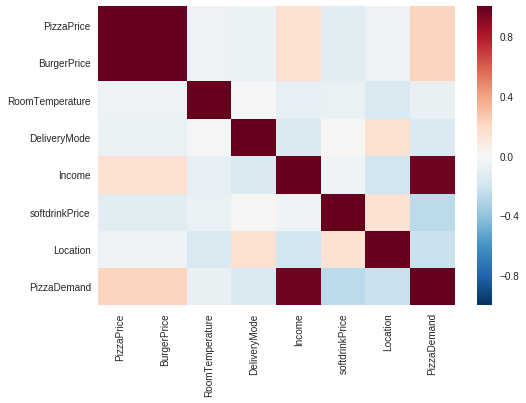

In [12]:
plt.matshow(regression_data.corr())
plt.xlabel('regression_data.columns')
plt.ylabel('regression_data.columns')
plt.xticklabels = regression_data.columns.values
plt.yticklabels = regression_data.columns.values
plt.show()

corr = regression_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


plt.show()

In [13]:
data = regression_data.copy()
data_train =  data.loc[:70,:]
data_test =  data.loc[71:,:]
data.head()

,PizzaPrice,BurgerPrice,RoomTemperature,DeliveryMode,Income,softdrinkPrice,Location,PizzaDemand
0,11.716233,9.716233,24.937096,2,21.772162,20.251733,2,15383.265370
1,8.695689,6.695689,24.772566,1,43.172762,14.877143,1,16036.037969
2,7.056686,5.056686,25.033494,2,18.661751,16.041785,1,15317.391311
3,12.499111,10.499111,24.978631,1,92.107600,22.401484,1,17327.343321
4,8.208723,6.208723,24.996846,2,51.482776,27.352832,1,16077.301577


### 1. data with all features

In [14]:
data_x_train1 = data_train.iloc[:,0:7]
data_y_train1 = data_train.iloc[:,-1]
data_x_test1 = data_test.iloc[:,0:7]
data_y_test1 = data_test.iloc[:,-1]
data_x_train1.head()

,PizzaPrice,BurgerPrice,RoomTemperature,DeliveryMode,Income,softdrinkPrice,Location
0,11.716233,9.716233,24.937096,2,21.772162,20.251733,2
1,8.695689,6.695689,24.772566,1,43.172762,14.877143,1
2,7.056686,5.056686,25.033494,2,18.661751,16.041785,1
3,12.499111,10.499111,24.978631,1,92.107600,22.401484,1
4,8.208723,6.208723,24.996846,2,51.482776,27.352832,1


In [15]:
regr1 = linear_model.LinearRegression()
print(regr1.fit(data_x_train1, data_y_train1))
print("coefficients = ", regr1.coef_, "\nintercept = ",regr1.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
coefficients =  [ -2.05107550e+11   2.05107550e+11   5.42312860e-03   2.65192986e-02
   2.80004425e+01  -1.50022202e+01   2.07240582e-02] 
intercept =  410215114339.0


Score =  0.999999971916
Mean squared error:  0.0152984460675


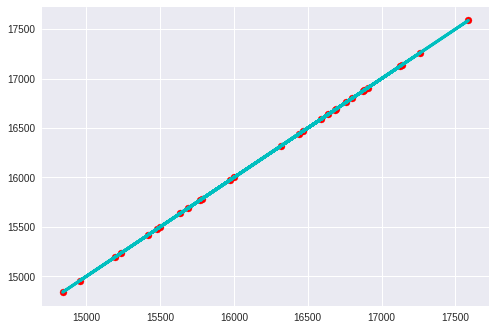

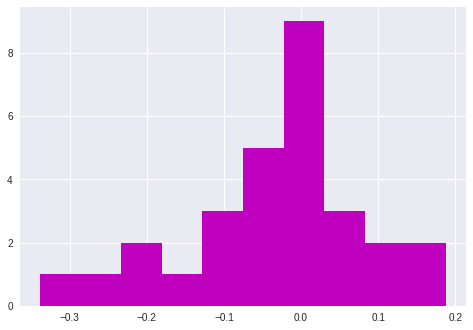

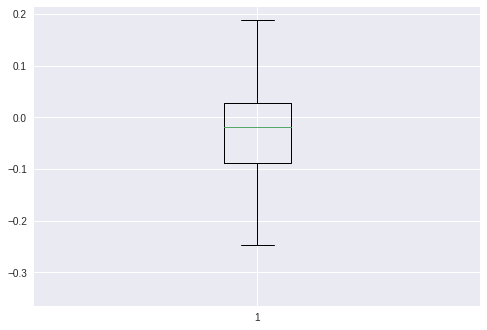

In [16]:
print("Score = ", regr1.score(data_x_test1, data_y_test1))
print("Mean squared error: ",np.mean((regr1.predict(data_x_test1)- data_y_test1)**2) )

plt.scatter(regr1.predict(data_x_test1),data_y_test1, color='r')
plt.plot(regr1.predict(data_x_test1),data_y_test1, color='c',linewidth=3)
plt.show()

plt.hist(regr1.predict(data_x_test1)- data_y_test1, color='m')
plt.show()
plt.boxplot(np.array(regr1.predict(data_x_test1)- data_y_test1),0)
plt.show()


In [17]:
#classification_data['PizzaDemand'] = (15000 - 5*classification_data.PizzaPrice + 14*classification_data.BurgerPrice - 15*classification_data.softdrinkPrice + 28*classification_data.Income)
#regression_data['PizzaDemandCalc'] = classification_data['PizzaDemand'].copy()
#regression_data['error_pz_demand'] = regression_data.PizzaDemandCalc - regression_data.PizzaDemand
#regression_data.head()
#regression_data['error_pz_demand_square'] = regression_data['error_pz_demand'] ** 2
#regression_data.error_pz_demand_square.sum()

### 2. dropping RoomTemperature

In [18]:
data_x_train2 = data_train.iloc[:,[0,1,3,4,5,6]]
data_y_train2 = data_train.iloc[:,-1]
data_x_test2 = data_test.iloc[:,[0,1,3,4,5,6]]
data_y_test2 = data_test.iloc[:,-1]
data_x_train2.columns

Index(['PizzaPrice', 'BurgerPrice', 'DeliveryMode', 'Income', 'softdrinkPrice',
       'Location'],
      dtype='object')

In [19]:
regr2 = linear_model.LinearRegression()
print(regr2.fit(data_x_train2, data_y_train2))
print(regr2.coef_,"....", regr2.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  4.49996379e+00   4.49996379e+00   2.65314778e-02   2.80004322e+01
  -1.50021693e+01   1.94862486e-02] .... 14980.9659678


In [20]:
print("Score = ", regr2.score(data_x_test2, data_y_test2))
print("Mean squared error: ",np.mean((regr2.predict(data_x_test2)- data_y_test2)**2) )
val_resid = regr2.predict(data_x_test2)- data_y_test2

Score =  0.999999972177
Mean squared error:  0.0151559974518


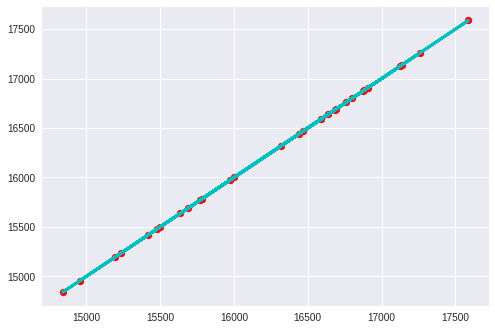

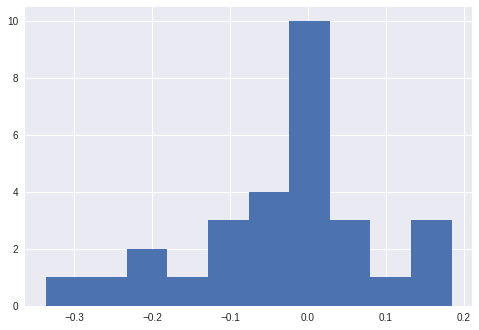

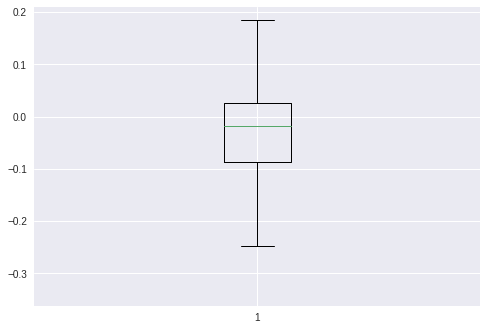

In [21]:
#f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
#ax1.plot(regr2.predict(data_x_test), data_x_test)
#ax1.set_title('predicted data_set')
#ax2.plot(data_y_train, data_x_train)
#ax2.set_title("previous data_set")
#plt.show()
plt.scatter(regr2.predict(data_x_test2),data_y_test2, color='r')
plt.plot(regr2.predict(data_x_test2),data_y_test2, color='c',linewidth=3)
plt.show()

plt.hist(regr2.predict(data_x_test2)- data_y_test2)
plt.show()
plt.boxplot(np.array(regr2.predict(data_x_test2)- data_y_test2),0)
plt.show()


### 3. dropping delivery mode

In [22]:
data_x_train3 = data_train.iloc[:,[0,1,2,4,5,6]]
data_y_train3 = data_train.iloc[:,-1]
data_x_test3 = data_test.iloc[:,[0,1,2,4,5,6]]
data_y_test3 = data_test.iloc[:,-1]
data_x_train3.columns

Index(['PizzaPrice', 'BurgerPrice', 'RoomTemperature', 'Income',
       'softdrinkPrice', 'Location'],
      dtype='object')

In [23]:
regr3 = linear_model.LinearRegression()
print(regr3.fit(data_x_train3, data_y_train3))
print(regr3.coef_,"....", regr3.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  4.49977372e+00   4.49977372e+00  -1.47754967e-02   2.80003153e+01
  -1.50020777e+01   1.97447902e-02] .... 14981.3819622


In [24]:
print("Score = ", regr3.score(data_x_test3, data_y_test3))
print("Mean squared error: ",np.mean((regr3.predict(data_x_test3)- data_y_test3)**2) )
print("Root mean squared error: ", math.sqrt(np.mean((regr3.predict(data_x_test3)- data_y_test3)**2)))

Score =  0.999999971363
Mean squared error:  0.0155994197779
Root mean squared error:  0.12489763719899796


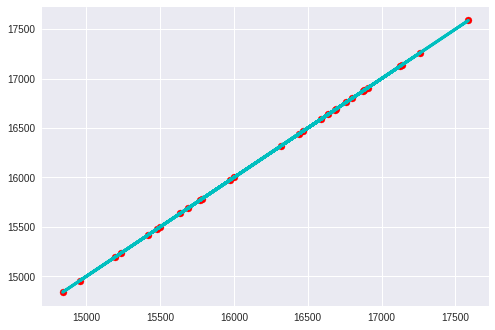

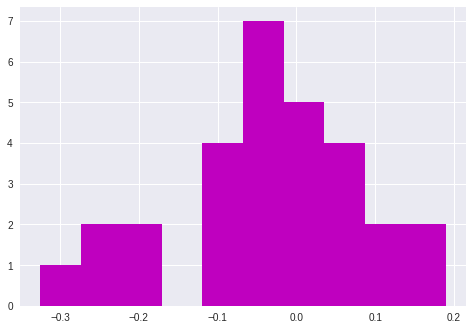

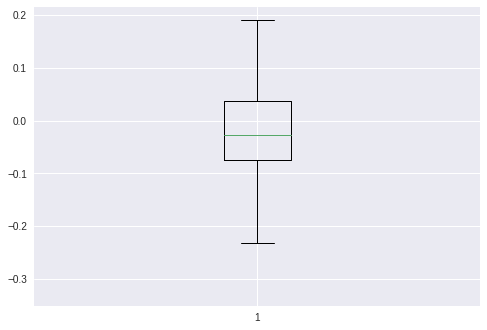

In [25]:
plt.scatter(regr3.predict(data_x_test3),data_y_test3, color='r')
plt.plot(regr3.predict(data_x_test3),data_y_test3, color='c',linewidth=3)
plt.show()

plt.hist(regr3.predict(data_x_test3)- data_y_test3, color='m')
plt.show()
plt.boxplot(np.array(regr3.predict(data_x_test3)- data_y_test3),0)
plt.show()


#### 4. dropping delivery mode , Room Temperature & location 

In [26]:
data_x_train4 = data_train.iloc[:,[0,1,4,5]]
data_y_train4 = data_train.iloc[:,-1]
data_x_test4 = data_test.iloc[:,[0,1,4,5]]
data_y_test4 = data_test.iloc[:,-1]
data_x_train4.columns

Index(['PizzaPrice', 'BurgerPrice', 'Income', 'softdrinkPrice'], dtype='object')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ -1.26916136e+11   1.26916136e+11   2.80001831e+01  -1.50019836e+01] .... 253832287659.0
Score =  0.999999971652
Mean squared error:  0.0154422530766
Root mean squared error:  0.12426686234290547


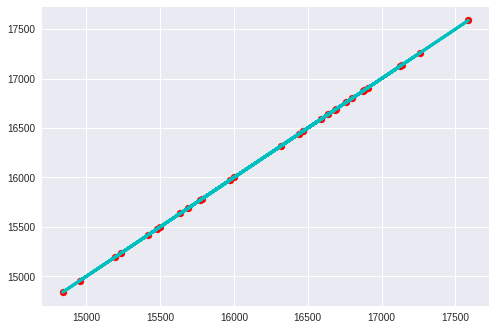

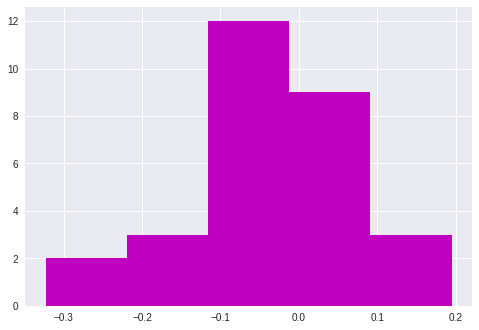

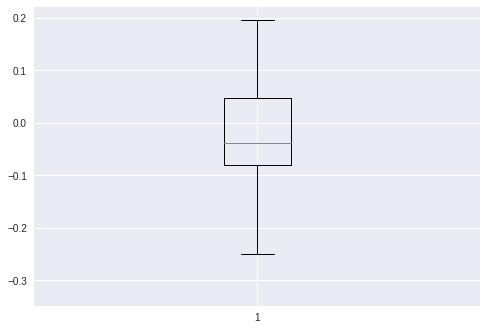

In [27]:
regr4 = linear_model.LinearRegression()
print(regr4.fit(data_x_train4, data_y_train4))
print(regr4.coef_,"....", regr4.intercept_)
print("Score = ", regr4.score(data_x_test4, data_y_test4))
print("Mean squared error: ",np.mean((regr4.predict(data_x_test4)- data_y_test4)**2) )
print("Root mean squared error: ", math.sqrt(np.mean((regr4.predict(data_x_test4)- data_y_test4)**2)))


plt.scatter(regr4.predict(data_x_test4), data_y_test4, color='r')
plt.plot(regr4.predict(data_x_test4), data_y_test4, color='c',linewidth=3)
plt.show()
plt.hist(regr4.predict(data_x_test4)- data_y_test4, color='m',bins=5)
plt.show()
plt.boxplot(np.array(regr4.predict(data_x_test4)- data_y_test4),0)
plt.show()

### Keeping pizza price, burger price, income

In [28]:
data_x_train5 = data_train.iloc[:,[1,4,5]]
data_y_train5 = data_train.iloc[:,-1]
data_x_test5 = data_test.iloc[:,[1,4,5]]
data_y_test5 = data_test.iloc[:,-1]
data_x_train5.columns

Index(['BurgerPrice', 'Income', 'softdrinkPrice'], dtype='object')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  8.99994362  28.0002307  -15.00200359] .... 14990.040713
Score =  0.999999971676
Mean squared error:  0.0154288105865
Root mean squared error:  0.12421276337995847


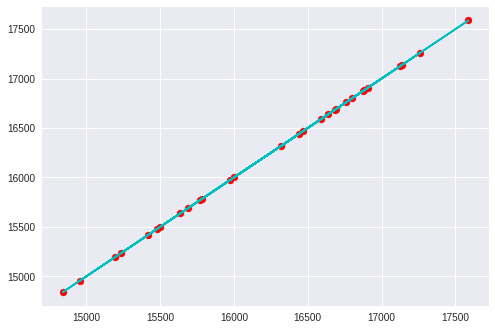

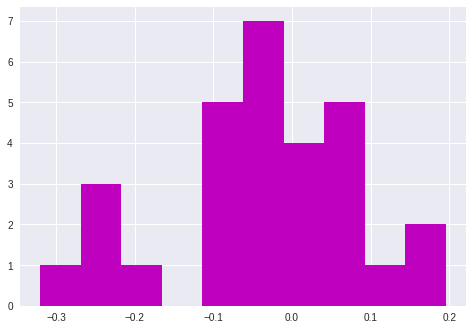

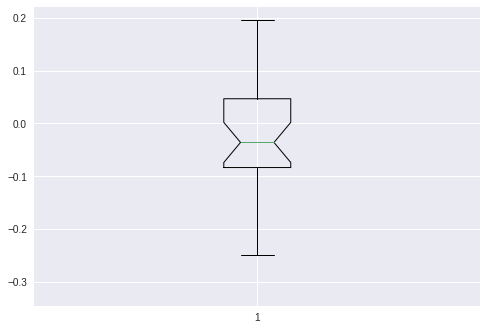

In [29]:
regr5 = linear_model.LinearRegression()
print(regr5.fit(data_x_train5, data_y_train5))
print(regr5.coef_,"....", regr5.intercept_)
print("Score = ", regr5.score(data_x_test5, data_y_test5))
print("Mean squared error: ",np.mean((regr5.predict(data_x_test5)- data_y_test5)**2) )
print("Root mean squared error: ", math.sqrt(np.mean((regr5.predict(data_x_test5)- data_y_test5)**2)))


plt.scatter(regr5.predict(data_x_test5),data_y_test5, color='r')
plt.plot(regr5.predict(data_x_test5),data_y_test5, color='c')
plt.show()

plt.hist(regr5.predict(data_x_test5)- data_y_test5, color='m')
plt.show()

plt.boxplot(np.array(regr5.predict(data_x_test5)- data_y_test5),1)
plt.show()

In [30]:
result = sm.ols(formula = "PizzaDemand ~ PizzaPrice + BurgerPrice + RoomTemperature + DeliveryMode + Income + softdrinkPrice + Location", data = data ).fit()

In [31]:
 print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            PizzaDemand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.928e+08
Date:                Fri, 31 Mar 2017   Prob (F-statistic):               0.00
Time:                        21:24:24   Log-Likelihood:                 89.453
No. Observations:                 100   AIC:                            -164.9
Df Residuals:                      93   BIC:                            -146.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4993.4907      0.864   57

In [32]:
result1 = sm.ols(formula = "PizzaDemand ~ PizzaPrice + BurgerPrice + RoomTemperature + DeliveryMode + Income + softdrinkPrice + Location", data = data ).fit()

In [33]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:            PizzaDemand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.928e+08
Date:                Fri, 31 Mar 2017   Prob (F-statistic):               0.00
Time:                        21:24:25   Log-Likelihood:                 89.453
No. Observations:                 100   AIC:                            -164.9
Df Residuals:                      93   BIC:                            -146.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4993.4907      0.864   57

In [34]:
result2 = sm.ols(formula = "PizzaDemand ~ PizzaPrice + BurgerPrice  + Income + softdrinkPrice  ", data = data ).fit()

In [35]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            PizzaDemand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.585e+09
Date:                Fri, 31 Mar 2017   Prob (F-statistic):               0.00
Time:                        21:24:25   Log-Likelihood:                 87.835
No. Observations:                 100   AIC:                            -167.7
Df Residuals:                      96   BIC:                            -157.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4993.6685      0.016   3.16e

In [36]:
result3 = sm.ols(formula = "PizzaDemand ~ PizzaPrice  + BurgerPrice + Income + softdrinkPrice  ", data = data ).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:            PizzaDemand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.585e+09
Date:                Fri, 31 Mar 2017   Prob (F-statistic):               0.00
Time:                        21:24:25   Log-Likelihood:                 87.835
No. Observations:                 100   AIC:                            -167.7
Df Residuals:                      96   BIC:                            -157.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4993.6685      0.016   3.16e

In [37]:
import statsmodels.stats.diagnostic as sms

name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(result3.resid, result3.model.exog)
list(zip(name,test))

[('F statistics', 1.3881651806718485), ('p_value', 0.13484747189480351)]

## Ridge Regression

In [38]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
%matplotlib inline

/home/user/Desktop/Stack/ML_Basics/ML_Basics/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [40]:
data_x = data.iloc[:,0:7]
data_y = data.iloc[:,-1]

In [41]:
    ridge = Ridge(normalize=True)
    coefs = []
    for a in alphas:
        ridge.set_params(alpha=a)
        ridge.fit(data_x, data_y)
        coefs.append(ridge.coef_)
    np.shape(coefs)

    coefs_df = pd.DataFrame(coefs, columns=data_x.columns.values)
    coefs_df['Alpha'] = pd.DataFrame(alphas)
    coefs_df.head()

,PizzaPrice,BurgerPrice,RoomTemperature,DeliveryMode,Income,softdrinkPrice,Location,Alpha
0,1.054523e-08,1.054523e-08,-1.042948e-07,-4.099583e-08,5.701560e-09,-3.735744e-09,-6.216555e-08,5.000000e+09
1,1.394017e-08,1.394017e-08,-1.378716e-07,-5.419407e-08,7.537127e-09,-4.938434e-09,-8.217919e-08,3.782317e+09
2,1.842809e-08,1.842809e-08,-1.822581e-07,-7.164137e-08,9.963638e-09,-6.528319e-09,-1.086361e-07,2.861184e+09
3,2.436085e-08,2.436085e-08,-2.409345e-07,-9.470568e-08,1.317134e-08,-8.630053e-09,-1.436105e-07,2.164381e+09
4,3.220361e-08,3.220361e-08,-3.185013e-07,-1.251953e-07,1.741174e-08,-1.140842e-08,-1.898446e-07,1.637275e+09


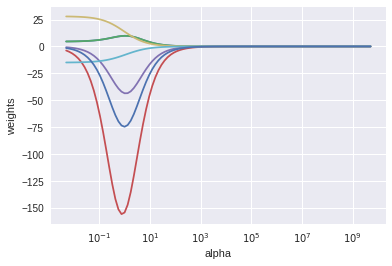

In [42]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [44]:
from plotly.offline import plot  
import plotly.plotly as py
import plotly.graph_objs as go

coef_df = coefs_df.iloc[:,:7]
labels = coefs_df.columns.values


colors = ['c','r','y','g','b','k','m']
line_size = [1,1,1,1,1,1,1]

traces = []

for i in range(0, len(coefs_df.columns)-1):
    traces.append(go.Scatter(
        x = coefs_df[labels[i]],
        y = coefs_df.Alpha,
        name = labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,       
    ))
    
    
layout = dict(title = 'Alpha vs weights',
              xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=traces, layout=layout)
plot(fig)

'file:///home/user/Desktop/Stack/ML_Basics/ML_Basics/temp-plot.html'

In [ ]:
coefs_df[labels[i]].head()

In [ ]:
from plotly.offline import plot  
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.PizzaPrice,
    name = 'PizzaPrice',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.BurgerPrice,
    name = 'BurgerPrice',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.RoomTemperature,
    name = 'RoomTemperature',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.DeliveryMode,
    name = 'DeliveryMode',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Income,
    name = 'Income',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.softdrinkPrice,
    name = 'softdrinkPrice',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Location,
    name = 'Location',
    line = dict(
        color = ('rgb(40, 123, 167)'),
        width = 4,
        dash = 'dot')
)
data1 = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = dict(title = 'Alpha vs weights',
              xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data1, layout=layout)
plot(fig)


In [ ]:
# Use the cross-validation package to split data into training and test sets
data_x_train, data_x_test , data_y_train, data_y_test = cross_validation.train_test_split(data_x, data_y, test_size=0.5, random_state=1)

In [ ]:
ridge2 = Ridge(alpha=10, normalize=True)
ridge2.fit(data_x_train, data_y_train)
pred2 = ridge2.predict(data_x_test)
print(pd.Series(ridge2.coef_, index=data_x.columns))
print(mean_squared_error(data_y_test, pred2))

In [ ]:
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridgecv.fit(data_x_train, data_y_train)
ridgecv.alpha_

In [ ]:
ridge3 = Ridge(alpha= ridgecv.alpha_, normalize=True)
ridge3.fit(data_x_train, data_y_train)
pred3 = ridge3.predict(data_x_test)
print(pd.Series(ridge3.coef_, index=data_x.columns))
print(mean_squared_error(data_y_test, pred3))

### Lasso

In [ ]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

In [ ]:
from sklearn.preprocessing import scale
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(data_x_train), data_y_train)
    coefs.append(lasso.coef_)

In [ ]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(data_x_train, data_y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(data_x_train, data_y_train)
mean_squared_error(data_y_test, lasso.predict(data_x_test))

In [46]:
coefs_df = pd.DataFrame(coefs, columns=data_x.columns.values)
coefs_df['Alpha'] = pd.DataFrame(alphas)
coefs_df.head()

from plotly.offline import plot  
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.PizzaPrice,
    name = 'PizzaPrice',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.BurgerPrice,
    name = 'BurgerPrice',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.RoomTemperature,
    name = 'RoomTemperature',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.DeliveryMode,
    name = 'DeliveryMode',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Income,
    name = 'Income',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.softdrinkPrice,
    name = 'softdrinkPrice',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Location,
    name = 'Location',
    line = dict(
        color = ('rgb(40, 123, 167)'),
        width = 4,
        dash = 'dot')
)
data1 = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = dict(title = 'Alpha vs weights',
              xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data1, layout=layout)
plot(fig)

'file:///home/user/Desktop/Stack/ML_Basics/ML_Basics/temp-plot.html'